# Proyecto Bibliométrico

A continuación se importan los paquetes requeridos y la muestra bibliométrica de 100 artículos. Guaramos estos datos en un datafram de pandas llamado _muestra_.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Settings for the plots
font = {'family': 'dosis',
        'weight': 'normal',
        'size': 14,
        }

sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('axes', linewidth=1.65 )   # width of the frame
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('font', size=14)          # controls default text sizes

MainColor1 = (0, 1, 1) 
BackColor1 = (0, .565, .573)
MainColor2 = (.498, 0, .698)
BackColor2 = (.282, 0, .40)
MainGray = (.549, .549, .549)
BackGray = (.4, .4, .4)


In [3]:
# Data Frames
muestra = pd.read_csv("Muestra.csv")
datos = pd.read_csv("FinalSearch.csv")

Las primeras entradas y las columnas del datafram se muestran a continuación

In [3]:
datos.head()

,Authors,Author full names,Author(s) ID,Year,Source title,Cited by,Link,EID
0,Hunt L.; Dayal P.; Magrini L.; Ferrara A.,"Hunt, Leslie (55538241000); Dayal, Pratika (24...",55538241000; 24829085600; 55139912800; 3617930...,2016,Monthly Notices of the Royal Astronomical Society,16,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-85046093591
1,Laurent P.; Goff J.-M.L.; Burtin E.; Hamilton ...,"Laurent, Pierre (56740220500); Goff, Jean-Marc...",56740220500; 57150443400; 6603734347; 34770173...,2016,Journal of Cosmology and Astroparticle Physics,23,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-85065654898
2,Hildebrandt H.; Choi A.; Heymans C.; Blake C.;...,"Hildebrandt, H. (8833942900); Choi, A. (565112...",8833942900; 56511267600; 6701712657; 710296095...,2016,Monthly Notices of the Royal Astronomical Society,69,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-85018351919
3,Gasperini M.,"Gasperini, M. (8283410200)",8283410200,2016,Journal of Cosmology and Astroparticle Physics,26,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-85005966652
4,Comaschi P.; Yue B.; Ferrara A.,"Comaschi, P. (57120108900); Yue, B. (349698339...",57120108900; 34969833900; 36179308300,2016,Monthly Notices of the Royal Astronomical Society,7,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-85015057968


In [81]:
datos.columns

Index(['Authors', 'Author full names', 'Author(s) ID', 'Year', 'Source title',
       'Cited by', 'Link', 'EID'],
      dtype='object')

In [4]:
datos.shape

(19105, 8)

In [24]:
len(datos.loc[1,'Author(s) ID'].split() )

19

In [9]:
datos.loc[1,'Authors']

'Laurent P.; Goff J.-M.L.; Burtin E.; Hamilton J.-C.; Hogg D.W.; Myers A.; Ntelis P.; Pâris I.; Rich J.; Aubourg E.; Bautista J.; Delubac T.; Bourboux H.D.M.D.; Eftekharzadeh S.; Delabrouille N.P.; Petitjean P.; Rossi G.; Schneider D.P.; Yeche C.'

Ahora, hagamos lo mismo con todas las entradas y creemos una nueva columna que asigne estos valoes a cada entrada:

## Análisis con la Muestra

Con la muestra de 100 artículos, lo primero que hacmeos es estudiar el número de autores en cada paper y los ordenaremos por año. De este modo, debemos encontrar el número de autores en cada entrada, para ello usamos lo siguiente:

In [83]:
NumAuthors = np.zeros(len(muestra))

for i in range(len(muestra)):
    NumAuthors[i] = len(muestra.loc[i,'Author(s) ID'].split() ) 
muestra['Number of Authors'] = NumAuthors


Algunas estadísticas breves que podemos visualizar numéricamente

In [17]:
muestra['Number of Authors'].describe()

count     100.000000
mean       39.970000
std       125.754648
min         1.000000
25%         3.000000
50%         8.000000
75%        22.000000
max      1124.000000
Name: Number of Authors, dtype: float64

In [74]:
muestra['Number of Authors'].value_counts()

2.0       12
3.0       11
1.0        9
4.0        7
21.0       6
6.0        5
15.0       4
22.0       4
8.0        4
7.0        4
19.0       3
48.0       2
9.0        2
10.0       2
24.0       2
28.0       2
124.0      1
64.0       1
70.0       1
65.0       1
63.0       1
1124.0     1
5.0        1
45.0       1
14.0       1
40.0       1
400.0      1
181.0      1
20.0       1
32.0       1
264.0      1
261.0      1
29.0       1
17.0       1
246.0      1
107.0      1
73.0       1
Name: Number of Authors, dtype: int64

Y ahora, finalmente, hagamos un scatter plot del número de autore y el año, para ver cuántos autores máximo se van obteniendo por año

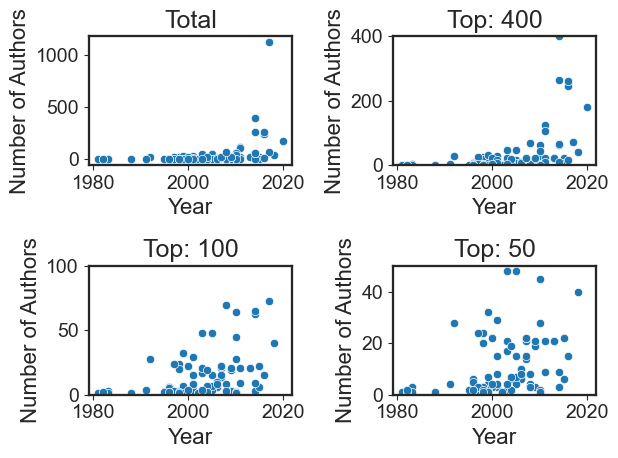

In [69]:
plt.subplot(2, 2, 1)

sns.scatterplot(y=muestra['Number of Authors'], x=muestra['Year'])
plt.title('Total')

plt.subplot(2, 2, 2)

sns.scatterplot(y=muestra['Number of Authors'], x=muestra['Year'])
plt.title('Top: 400')
plt.ylim(bottom=0, top=400)

plt.subplot(2, 2, 3)

sns.scatterplot(y=muestra['Number of Authors'], x=muestra['Year'])
plt.title('Top: 100')
plt.ylim(bottom=0, top=100)

plt.subplot(2, 2, 4)

sns.scatterplot(y=muestra['Number of Authors'], x=muestra['Year'])
plt.title('Top: 50')
plt.ylim(bottom=0, top=50)


plt.tight_layout()
plt.show()


Ya con este plot, se puede ver a diferentes escalas que el número de autores tiende a aumentar a lo largo del tiempo, en el período 1980-2020.

La siguiente gráfica comprende solamente un máximo de 100 autores, es decir, la que se encuentra abajo a la izquierda en el gráfico previo

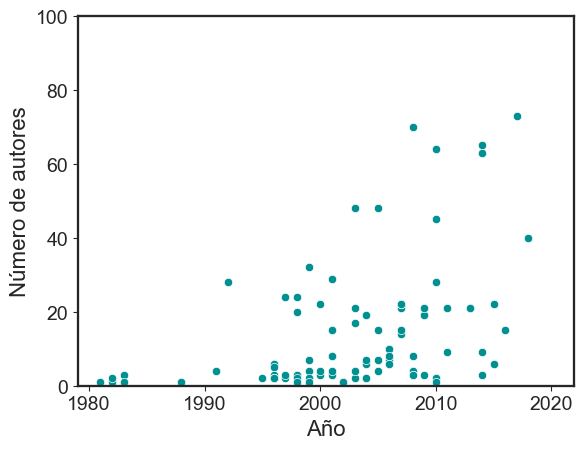

In [164]:
sns.scatterplot(y=muestra['Number of Authors'], x=muestra['Year'], color=BackColor1)

plt.xlabel('Año')
plt.ylabel('Número de autores')

plt.ylim(bottom=0, top=100)

plt.savefig('Figures/MuestraScatter.svg')
plt.savefig('Figures/MuestraScatter.pdf')
plt.show()

Tomemos ahora los datos de número de autores mayores a 20 en el mismo bin de 20 autores, para simplificar el análisis posterior.

In [90]:
muestra['Number of Authors (upto 20)'] = muestra['Number of Authors'].replace(np.arange(21, 1125, 1), 20)
muestra['Number of Authors (upto 100)'] = muestra['Number of Authors'].replace(np.arange(101, 1125, 1), 100)
#muestra['Number of Authors'] = muestra['Number of Authors'].replace(np.arange(11, 1125, 1), 20)

Con esto hacemos el historama de número de autores

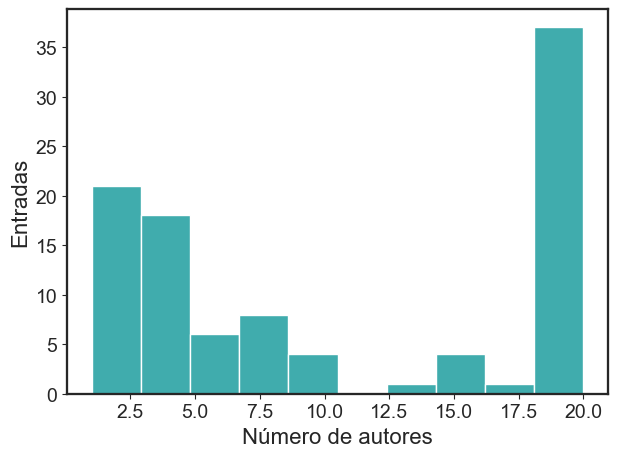

In [77]:
sns.histplot(data=muestra['Number of Authors (upto 20)'], bins=10, color=BackColor1)

plt.xlabel('Número de autores')
plt.ylabel('Entradas')

plt.tight_layout()
plt.savefig('Figures/MuestraAuthorsCount.svg')
plt.savefig('Figures/MuestraAuthorsCount.pdf')
plt.show()

Ahora, quisieramos ver el número de artículos de solamente 1 autor, en el mismo período de tiempo.

In [78]:
muestra['One Author'] = (muestra['Number of Authors (upto 20)'] == 1)
muestra['Two Authors'] = (muestra['Number of Authors (upto 20)'] == 2)
muestra['Less than 5 authors'] = (muestra['Number of Authors (upto 20)'] <=5) 
muestra['More than 10 authors'] = (muestra['Number of Authors (upto 20)'] >=10)


False    91
True      9
Name: One Author, dtype: int64

In [18]:
muestra.loc[:,['Year', 'One Author']].value_counts()

Year  One Author
1996  False         7
2001  False         6
2014  False         6
1998  False         5
2006  False         5
2004  False         5
2003  False         5
2008  False         5
2007  False         5
2011  False         4
1999  False         4
2010  False         4
2009  False         4
2005  False         4
1997  False         3
2000  False         3
2016  False         3
2013  False         2
2015  False         2
2017  False         2
2002  True          2
2010  True          1
2018  False         1
1981  True          1
1982  False         1
1999  True          1
1998  True          1
1995  False         1
1992  False         1
1991  False         1
1988  True          1
1983  True          1
      False         1
1982  True          1
2020  False         1
dtype: int64

A continuación creamos varias series de acuerdo al número de autores por año, para 1, 2, menos de 5 y más de 10

In [79]:
SingleAuthorYears = muestra.loc[muestra['One Author'], 'Year']
TwoAuthorYears = muestra.loc[muestra['Two Authors'], 'Year']
LessThanFiveAuthorYears = muestra.loc[muestra['Less than 5 authors'], 'Year']
MoreThanTenAuthorYears = muestra.loc[muestra['More than 10 authors'], 'Year']
AllAuthorYears = muestra.loc[:, 'Year']

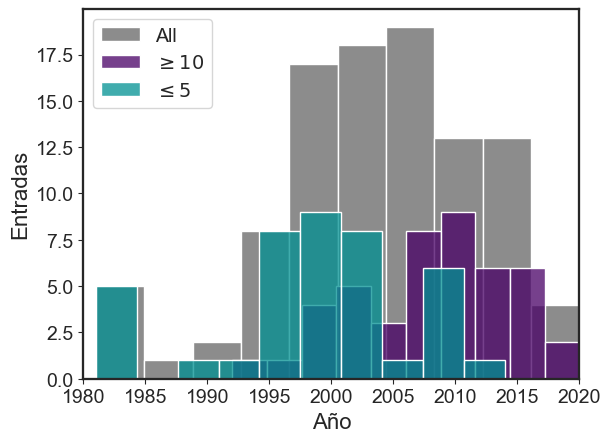

In [162]:
sns.histplot(data=AllAuthorYears, bins=10, color=BackGray, label="All")
sns.histplot(data=MoreThanTenAuthorYears, bins=10, color=BackColor2, label="$\geq 10$")
sns.histplot(data=LessThanFiveAuthorYears, bins=10, color=BackColor1, label="$\leq 5$")

plt.legend(loc=2)
plt.xlabel('Año')
plt.ylabel('Entradas')

plt.xlim(xmin=1980, xmax=2020)
plt.savefig("Figures/MuestraHistogramsYears.svg")
plt.savefig("Figures/MuestraHistogramsYears.pdf")
plt.show()

Ahora tomemos algunos Boxplots para hacer estadísticas globales.

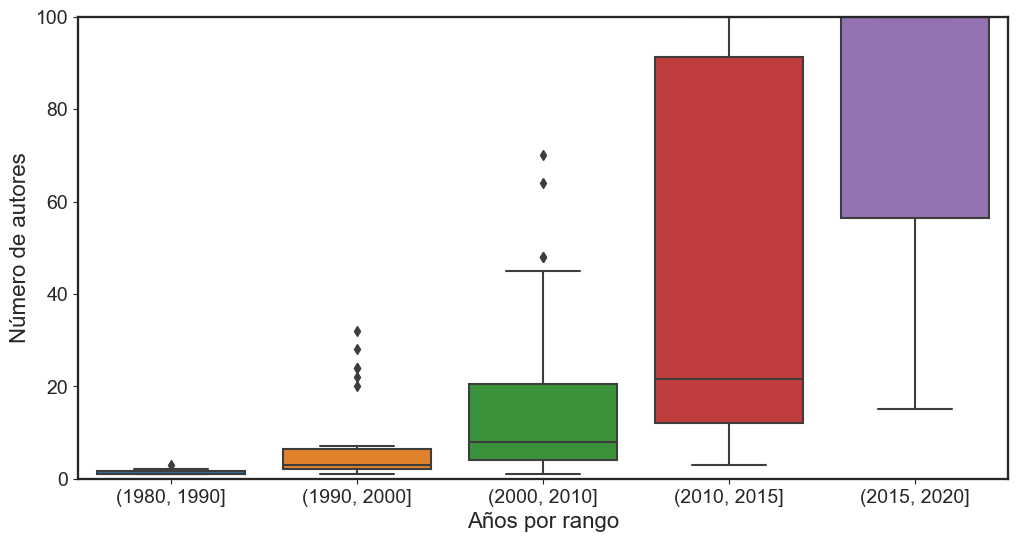

In [93]:
muestra["YrGroup"] = pd.cut(muestra['Year'], [1980, 1990, 2000, 2010, 2015, 2020])
plt.figure(figsize=(12, 6)) 
sns.boxplot(x="YrGroup", y="Number of Authors (upto 100)", data=muestra)

plt.xlabel('Años por rango')
plt.ylabel('Número de autores')
plt.ylim([0,100])
plt.show()


C:\Users\Nicolás\AppData\Local\Temp\ipykernel_27808\4272072390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muestra_XX["YrGroup"] = pd.cut(muestra_XX['Year'], [1980, 1990, 2000])
C:\Users\Nicolás\AppData\Local\Temp\ipykernel_27808\4272072390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muestra_XXI["YrGroup"] = pd.cut(muestra_XXI['Year'], [2000, 2005, 2010, 2015, 2020])


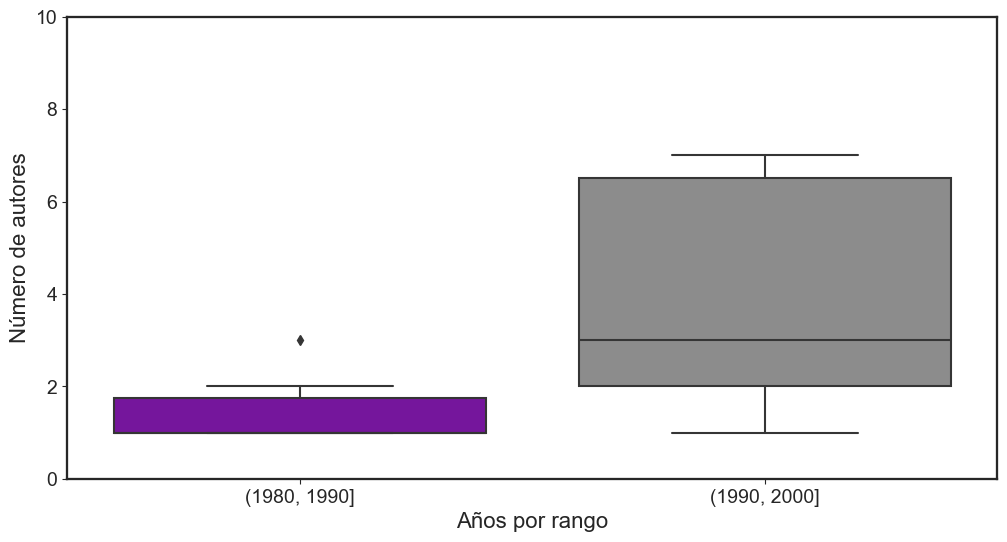

In [116]:
# Filtrar datos para incluir solo los 3 últimos rangos de años
muestra_XX = muestra[muestra['Year'].between(1980, 2000)]
muestra_XXI = muestra[muestra['Year'].between(2000, 2020)]

# Crear la columna 'YrGroup' basada en los rangos específicos
muestra_XX["YrGroup"] = pd.cut(muestra_XX['Year'], [1980, 1990, 2000])
muestra_XXI["YrGroup"] = pd.cut(muestra_XXI['Year'], [2000, 2005, 2010, 2015, 2020])

# Crear el gráfico con los datos filtrados del siglo XX
plt.figure(figsize=(12, 6)) 
sns.boxplot(x="YrGroup", y="Number of Authors", data=muestra_XX, palette=( MainColor2, MainGray))

plt.ylim([0, 10])
plt.xlabel('Años por rango')
plt.ylabel('Número de autores')
plt.show()

C:\Users\Nicolás\AppData\Local\Temp\ipykernel_27808\1446301065.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muestra_XX["YrGroup"] = pd.cut(muestra_XX['Year'], [1980, 1990, 2000])
C:\Users\Nicolás\AppData\Local\Temp\ipykernel_27808\1446301065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muestra_XXI["YrGroup"] = pd.cut(muestra_XXI['Year'], [2000, 2005, 2010, 2015, 2020])


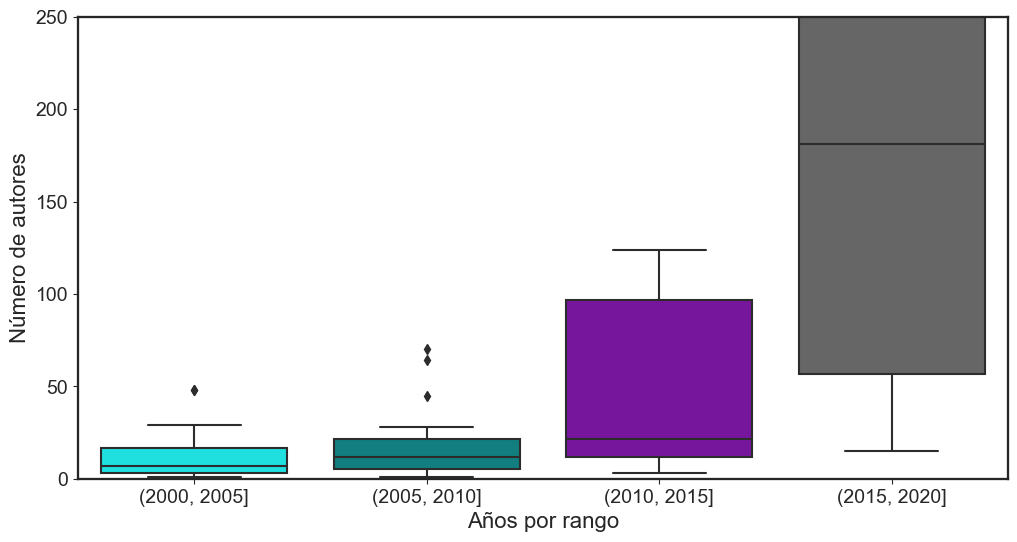

In [111]:
# Crear el gráfico con los datos filtrados del siglo XXI
plt.figure(figsize=(12, 6)) 
sns.boxplot(x="YrGroup", y="Number of Authors", data=muestra_XXI, palette=( MainColor1, BackColor1, MainColor2, BackGray))

plt.xlabel('Años por rango')
plt.ylabel('Número de autores')
plt.ylim([0, 250])
plt.show()


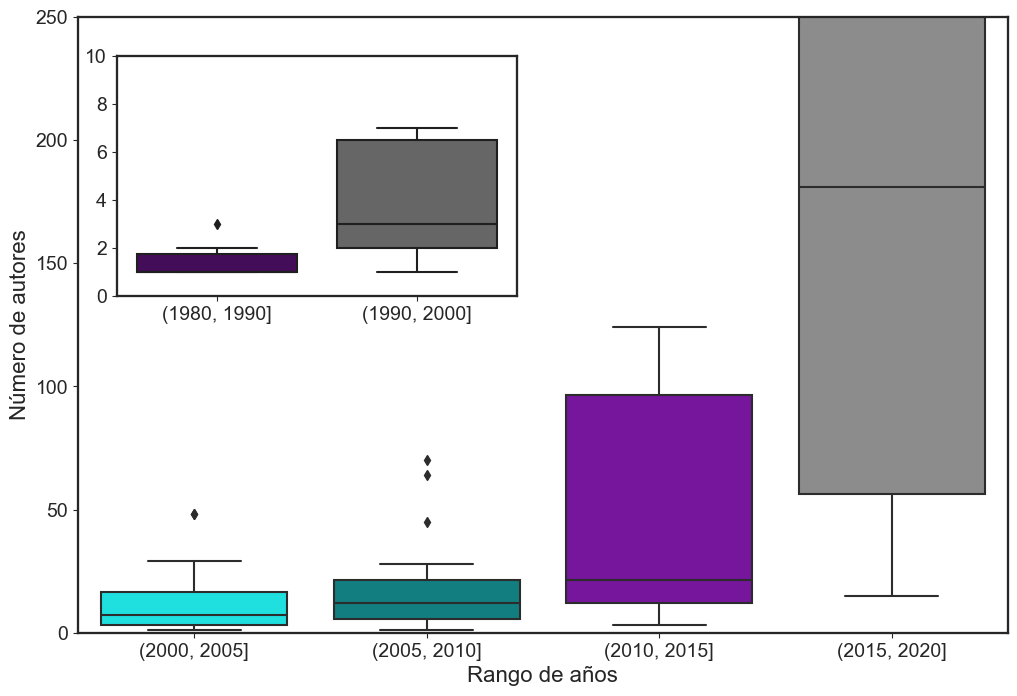

In [158]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.boxplot(x="YrGroup", y="Number of Authors", data=muestra_XXI, palette=( MainColor1, BackColor1, MainColor2, MainGray))


ax.set_xlabel('Rango de años')
ax.set_ylabel('Número de autores')
ax.set_ylim([0, 250])
# Create inset of width 1.3 inches and height 0.9 inches
# at the default upper right location
axins = inset_axes(ax, width=4, height=2.4, loc=(2), borderpad=2 )
sns.boxplot(x="YrGroup", y="Number of Authors", data=muestra_XX, palette=( BackColor2, BackGray))
axins.set_ylim([0, 10])
axins.tick_params(labelleft=True, labelbottom=True)
axins.set_ylabel(None)
axins.set_xlabel(None)

plt.savefig('Figures/MuestraBoxYearRange.svg')
plt.savefig('Figures/MuestraBoxYearRange.pdf')
plt.show()

### Citations

## Análisis con todos los datos


In [18]:
NTot = len(datos)
NumberOfAuthors = np.zeros(NTot)

for i in range(NTot):
    NumberOfAuthors[i] = len(datos.loc[i,'Author(s) ID'].split() ) 
datos['Number of Authors'] = NumberOfAuthors


In [17]:
datos['Number of Authors'].describe()

count    19105.000000
mean         6.695734
std         19.420777
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        633.000000
Name: Number of Authors, dtype: float64

In [16]:
datos['Number of Authors'].value_counts()

2.0      4617
3.0      4113
4.0      2620
1.0      2048
5.0      1459
         ... 
229.0       1
109.0       1
159.0       1
180.0       1
79.0        1
Name: Number of Authors, Length: 177, dtype: int64

Scatter plot para visualizar el número de artículos con un determinado número de artistas y el año en quue fue publicado

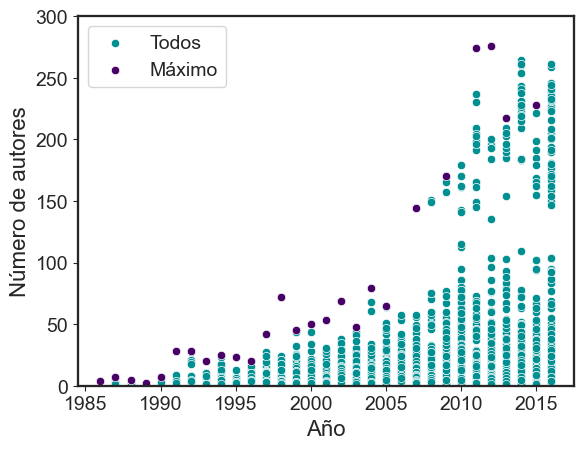

In [7]:
maxAuthorNumber = datos.groupby('Year')['Number of Authors'].max()
YearSpan = sorted(datos['Year'].unique())

sns.scatterplot(y=datos['Number of Authors'], x=datos['Year'], color=BackColor1, label='Todos')
sns.scatterplot(y=maxAuthorNumber, x=YearSpan, color=BackColor2, label='Máximo')
plt.legend(loc=2)

plt.xlabel('Año')
plt.ylabel('Número de autores')

plt.ylim(bottom=0, top=300)

plt.savefig('Figures/DatosScatter.svg')
plt.savefig('Figures/DatosScatter.pdf')
plt.show()

Lo siguiente es el histograma con el número de autores

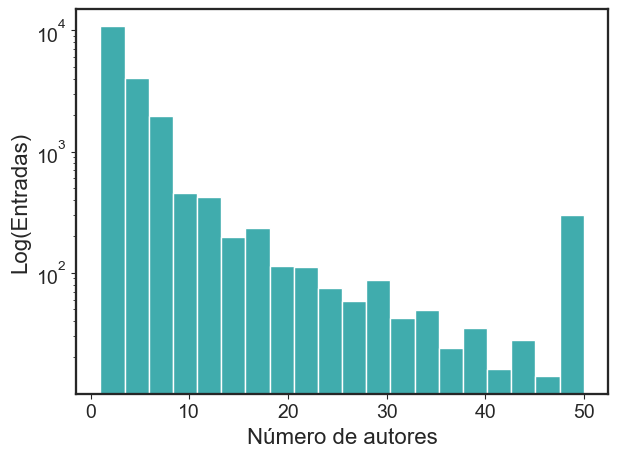

In [8]:
datos['Number of Authors (upto 20)']  = datos['Number of Authors'].replace(np.arange(21, 700, 1), 20)
datos['Number of Authors (upto 50)']  = datos['Number of Authors'].replace(np.arange(51, 700, 1), 50)
datos['Number of Authors (upto 100)'] = datos['Number of Authors'].replace(np.arange(101, 700, 1), 100)



sns.histplot(data=datos['Number of Authors (upto 50)'], bins=20, color=BackColor1)

plt.xlabel('Número de autores')
plt.ylabel('Log(Entradas)')

plt.yscale('log')
plt.tight_layout()
plt.savefig('Figures/DatosAuthorsCount.svg')
plt.savefig('Figures/DatosAuthorsCount.pdf')
plt.show()

Ahora, veamos los hitogramas de número de autores seccionado, en cada año

In [15]:
datos['One Author']   = (datos['Number of Authors'] == 1)
datos['Two Authors']  = (datos['Number of Authors'] == 2)
datos['Less than 5']  = (datos['Number of Authors'] <=5) 
datos['More than 5'] = (datos['Number of Authors'] >=5)

SingleAuthorYears = datos.loc[datos['One Author'], 'Year']
TwoAuthorYears = datos.loc[datos['Two Authors'], 'Year']
LessThanFiveAuthorYears = datos.loc[datos['Less than 5'], 'Year']
MoreThanTenAuthorYears = datos.loc[datos['More than 5'], 'Year']
AllAuthorYears = datos.loc[:, 'Year']

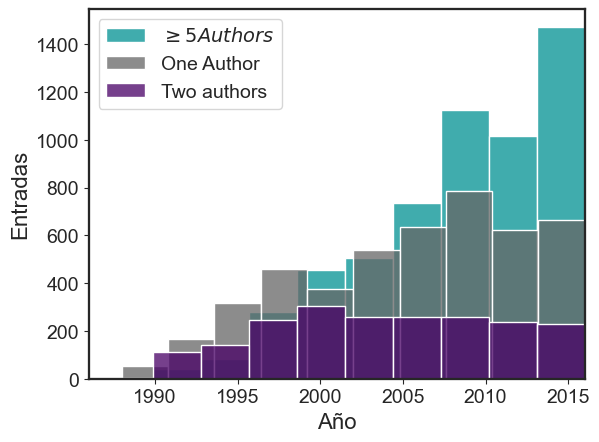

In [14]:
sns.histplot(data=MoreThanTenAuthorYears, bins=10, color=BackColor1, label="$\geq 5 Authors$")
sns.histplot(data=TwoAuthorYears, bins=10, color=BackGray, label='One Author')
sns.histplot(data=SingleAuthorYears, bins=10, color=BackColor2, label='Two authors')

#sns.histplot(data=AllAuthorYears, bins=30, color=BackGray, label="All")
#sns.histplot(data=LessThanFiveAuthorYears, bins=30, color=BackColor1, label="$\leq 5$")


plt.legend(loc=2)
plt.xlabel('Año')
plt.ylabel('Entradas')

plt.xlim(xmin=1986, xmax=2016)
#plt.yscale('log')
plt.savefig("Figures/DatosHistogramsYears.svg")
plt.savefig("Figures/DatosHistogramsYears.pdf")
plt.show()

Finalmente, tenemmos los Boxplots con las distribuciones del número de autores

C:\Users\Nicolás\AppData\Local\Temp\ipykernel_184\1870624831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_XX["YrGroup"]  = pd.cut(datos_XX['Year'], [1980, 1990, 2000])
C:\Users\Nicolás\AppData\Local\Temp\ipykernel_184\1870624831.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_XXI["YrGroup"] = pd.cut(datos_XXI['Year'], [2000, 2005, 2010, 2015, 2020])


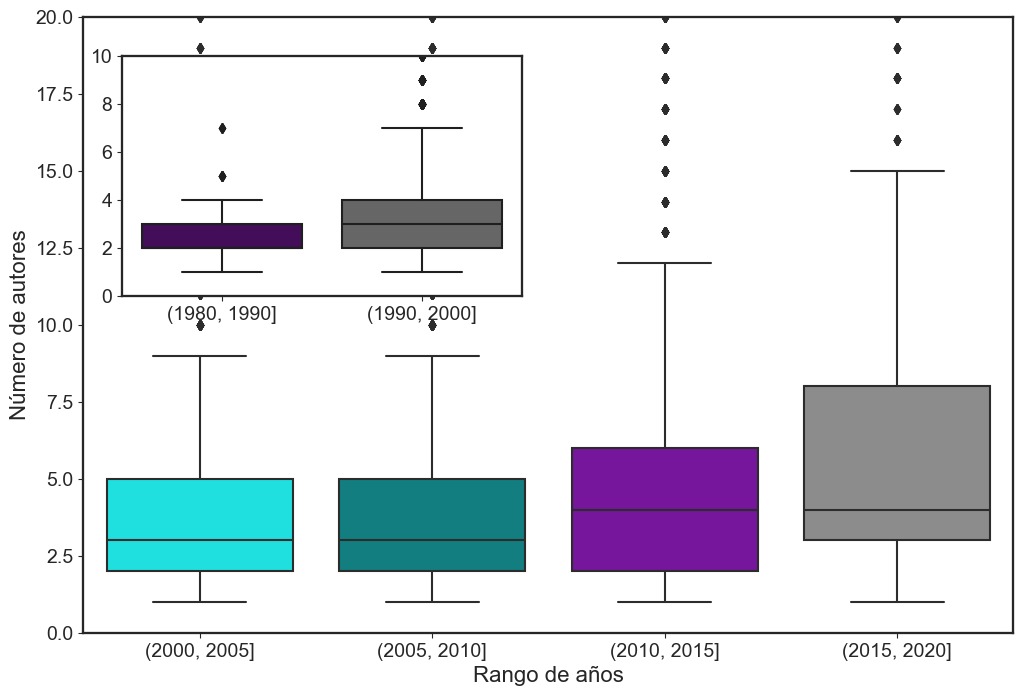

In [72]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# Filtrar datos para incluir solo los 3 últimos rangos de años
datos_XX  = datos[datos['Year'].between(1980, 2000)]
datos_XXI = datos[datos['Year'].between(2000, 2020)]

# Crear la columna 'YrGroup' basada en los rangos específicos
datos_XX["YrGroup"]  = pd.cut(datos_XX['Year'], [1980, 1990, 2000])
datos_XXI["YrGroup"] = pd.cut(datos_XXI['Year'], [2000, 2005, 2010, 2015, 2020])


fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.boxplot(x="YrGroup", y="Number of Authors (upto 50)", data=datos_XXI, palette=( MainColor1, BackColor1, MainColor2, MainGray))


ax.set_xlabel('Rango de años')
ax.set_ylabel('Número de autores')
ax.set_ylim([0, 20])
# Create inset of width 1.3 inches and height 0.9 inches
# at the default upper right location
axins = inset_axes(ax, width=4, height=2.4, loc=(2), borderpad=2 )
sns.boxplot(x="YrGroup", y="Number of Authors", data=datos_XX, palette=( BackColor2, BackGray))
axins.set_ylim([0, 10])
axins.tick_params(labelleft=True, labelbottom=True)
axins.set_ylabel(None)
axins.set_xlabel(None)

plt.savefig('Figures/DatosBoxYearRange.svg')
plt.savefig('Figures/DatosBoxYearRange.pdf')
plt.show()

Porcentaje de artículos con un solo autor

In [9]:
datos['One Author']   = (datos['Number of Authors'] == 1)
datos['Two Authors']  = (datos['Number of Authors'] == 2)
datos['Less than 5']  = (datos['Number of Authors'] <=5) 
datos['More than 5'] = (datos['Number of Authors'] >=5)

SingleAuthorYears = datos.loc[datos['One Author'], 'Year']
TwoAuthorYears = datos.loc[datos['Two Authors'], 'Year']
LessThanFiveAuthorYears = datos.loc[datos['Less than 5'], 'Year']
MoreThanTenAuthorYears = datos.loc[datos['More than 5'], 'Year']
AllAuthorYears = datos.loc[:, 'Year']


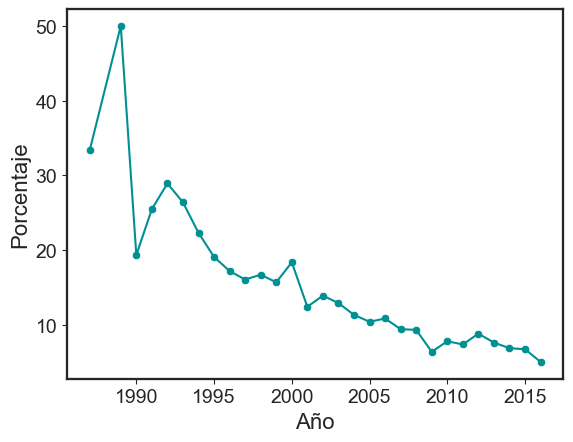

In [33]:
SingleAuthorPercentage = SingleAuthorYears.value_counts()/AllAuthorYears.value_counts() * 100

sns.scatterplot(y=SingleAuthorPercentage, x=YearSpan, color=BackColor1)
sns.lineplot(y=SingleAuthorPercentage, x=YearSpan, color=BackColor1)

plt.xlabel('Año')
plt.ylabel('Porcentaje')


plt.savefig('Figures/DatosPercentage.svg')
plt.savefig('Figures/DatosPercentage.pdf')
plt.show()



Número promedio de autores por año

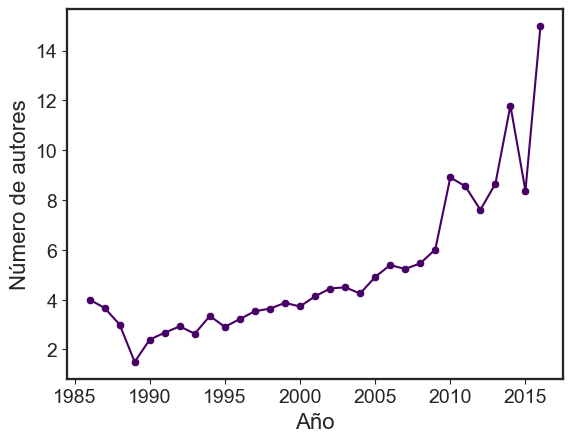

In [29]:
AverageAuthorNumber = datos.groupby('Year')['Number of Authors'].mean()
YearSpan = sorted(datos['Year'].unique())

#sns.scatterplot(y=datos['Number of Authors'], x=datos['Year'], color=BackColor1, label='Todos')

sns.lineplot(y=AverageAuthorNumber, x=YearSpan, color=BackColor2)
sns.scatterplot(y=AverageAuthorNumber, x=YearSpan, color=BackColor2)

plt.xlabel('Año')
plt.ylabel('Número de autores')


plt.savefig('Figures/DatosAverage.svg')
plt.savefig('Figures/DatosAverage.pdf')
plt.show()